In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm 
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'custom'


#Then update the math texts with the fonts that are needed in math mode

plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

In [14]:
import uproot

In [15]:
f = uproot.open('/Users/jshlomi/Desktop/efficiency.root')

In [50]:
f['']

In [118]:
f['h_dR1']

<b'TH1D' b'h_dR1' 0x000125a83d18>

In [33]:
f['h_effpt0']

<b'TH3D' b'h_eff0' 0x0001375af228>

In [86]:
np.where( h_eff_edges[0] > 600 )

(array([178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
        191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
        204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
        217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
        230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
        243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255,
        256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268,
        269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281,
        282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,
        295, 296, 297, 298, 299, 300]),)

In [35]:
h_eff.shape

(300, 100)

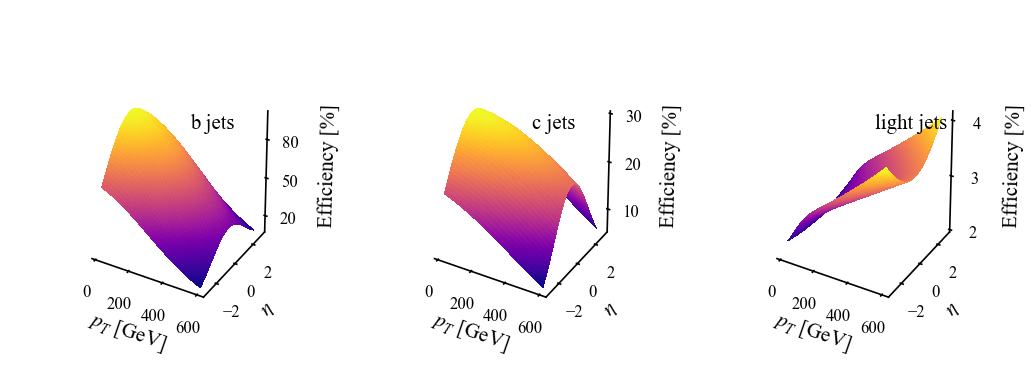

In [172]:
fig = plt.figure(figsize=(7,7/3.0+0.3),dpi=150)
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#ax4 = fig.add_subplot(1,4,4)

for flav,flavname in zip([0,1,2],['b jets','c jets','light jets']):
    h_eff = f['h_effpt'+str(flav)].values
    h_eff_edges = f['h_effpt'+str(flav)].edges
    
#     h_dr = f['h_dR'+str(flav)].values
#     h_dr_bins = f['h_dR'+str(flav)].edges
#     h_dr_bins = [(h_dr_bins[i]+h_dr_bins[i+1])*0.5 for i in range(len(h_dr_bins)-1)]
    
#     ax4.plot(h_dr_bins,h_dr)
    ax = fig.add_subplot(1,3,flav+1, projection='3d')


    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)


    xedges = h_eff_edges[0][:178]
    yedges = h_eff_edges[1][1:-1]
    Y = [0.5*(yedges[i]+yedges[i+1]) for i in range(len(yedges)-1)]
    X = [0.5*(xedges[i]+xedges[i+1]) for i in range(len(xedges)-1)]
    X, Y = np.meshgrid(X, Y)

    Z = h_eff[:177][:,:98].T
    
    ax.plot_surface(X, Y, Z, cmap=cm.plasma,
                           linewidth=0, antialiased=False)
    
    if flav==2:
        ax.set_zticks([0.02,0.03,0.04])
        #ax.text(250,0,0.04,flavname,fontsize=10)
    if flav==0:
        ax.set_zticks([0.2,0.5,0.8])
        #ax.text(250,0,0.8,flavname,fontsize=10)
    if flav==1:
        ax.set_zticks([0.1,0.2,0.3])
    ax.text2D(0.006,0.03,flavname,fontsize=10)
    
    #ax.set_xlim(0,500)
    ax.set_xlabel(r'$p_{T}$ [GeV]',fontsize=10)
    ax.set_ylabel(r'$\eta$',fontsize=10)
    ax.set_zlabel('\nEfficiency [%]',fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    @ticker.FuncFormatter
    def major_formatter(x, pos):
        return int( 100*x )
    ax.zaxis.set_major_formatter(major_formatter)
    #ax.set_zlim(0,1)
    ax.dist = 14
    




plt.tight_layout()

plt.savefig('/Users/jshlomi/Desktop/temp_tt/paper/5e333eb35e63e000015ede68/figures/true_effmaps.pdf',bbox_inches='tight')
plt.show()

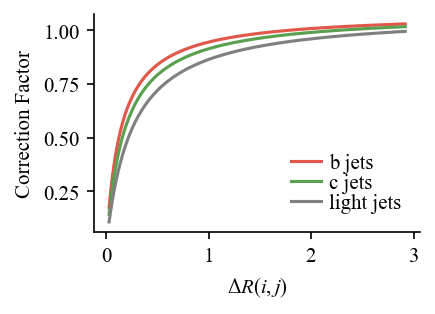

In [170]:
fig = plt.figure(figsize=(3,2.2),dpi=150)
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = fig.add_subplot(1,1,1)

flav_colors = [
    '#e15749',
     #'#4e79a7',
    '#59a14f',
   # '#59a14f',
    #
    # ,
    'gray'
]

for flav,flavname in zip([0,1,2],['b jets','c jets','light jets']):
    h_eff = f['h_effpt'+str(flav)].values
    h_eff_edges = f['h_effpt'+str(flav)].edges
    
    h_dr = f['h_dR'+str(flav)].values
    h_dr_bins = f['h_dR'+str(flav)].edges
    h_dr_bins = [(h_dr_bins[i]+h_dr_bins[i+1])*0.5 for i in range(len(h_dr_bins)-1)]

    
    h_dr = h_dr[:195]
    h_dr_bins = h_dr_bins[:195]

    
    ax.plot(h_dr_bins,h_dr,label=flavname,c=flav_colors[flav])
    
ax.legend(fontsize=10,frameon=False,fancybox=False,shadow=False,
                handletextpad=0.4,labelspacing=0.001,handlelength=1.4)
    
ax.set_xlabel(r'$\Delta R (i,j)$',fontsize=10)
ax.set_ylabel('Correction Factor',fontsize=10)
plt.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('/Users/jshlomi/Desktop/temp_tt/paper/5e333eb35e63e000015ede68/figures/true_drcorrection.pdf',bbox_inches='tight')
plt.show()

In [99]:
h_eff.shape

(300, 100)

In [101]:
h_eff[:177][:,:96].shape

(177, 96)